In [139]:
import pandas as pd
import matplotlib.pyplot as plt
bus_df = pd.read_csv('data_acquisition/combined/bus.csv')
metro_df = pd.read_csv('data_acquisition/combined/metro.csv')
taxi_df = pd.read_excel('data_acquisition/combined/taxi.xlsx')
uber_df = pd.read_csv('data_acquisition/combined/uber.csv')

In [140]:
bus_df.columns=['Date','Bus']
bus_df['Date'] = pd.to_datetime(bus_df['Date'],format='%Y%m')
bus_df.dtypes
bus_df.head()

,Date,Bus
0,2013-07-01,3068599.0
1,2013-08-01,3091873.0
2,2013-09-01,3252460.0
3,2013-10-01,3250529.0
4,2013-11-01,3069970.0


In [141]:
metro_df = metro_df[['Date', 'ROTP', 'RailReliability', 'MetroAccessOTP',
       'EscalatorAvail', 'ElevatorAvail', 'TotalInjuries', 'Crime',
       'Ridership']]
metro_df['Date'] = pd.to_datetime(metro_df['Date'])
metro_ride = metro_df[['Date','Ridership']]
metro_ride.head()

,Date,Ridership
0,2011-01-01,21082553
1,2011-02-01,21228262
2,2011-03-01,26170157
3,2011-04-01,25656797
4,2011-05-01,24342603


In [100]:
taxi_df.columns=['Date','Taxi']
taxi_df['Date'] = pd.to_datetime(taxi_df['Date'],format='%Y%m')
taxi_df.head()

,Date,Taxi
0,2015-05-01,1397101
1,2015-06-01,1470465
2,2015-07-01,1401791
3,2015-08-01,1129706
4,2015-09-01,1308444


In [101]:
uber_df.columns = ['Date','Uber']
uber_df['Date'] = pd.to_datetime(uber_df['Date'],format='%Y%m')
uber_df.head()

,Date,Uber
0,2016-01-01,4336528.0
1,2016-02-01,4105444.0
2,2016-03-01,4731468.0
3,2016-04-01,4583160.0
4,2016-05-01,4918088.0


In [102]:
print(bus_df.shape)
print(metro_df.shape)
print(taxi_df.shape)
print(uber_df.shape)

(60, 2)
(84, 9)
(27, 2)
(27, 2)


In [123]:
combined_df = pd.merge(bus_df,metro_ride,on='Date',how='outer')
combined_df = pd.merge(combined_df,taxi_df,on='Date',how='outer')
combined_df = pd.merge(combined_df,uber_df,on='Date',how='outer')
combined_df = combined_df.sort_values('Date').set_index('Date')
combined_df.head()

,Bus,Ridership,Taxi,Uber
Date,,,,
2011-01-01,NaN,21082553.0,NaN,NaN
2011-02-01,NaN,21228262.0,NaN,NaN
2011-03-01,NaN,26170157.0,NaN,NaN
2011-04-01,NaN,25656797.0,NaN,NaN
2011-05-01,NaN,24342603.0,NaN,NaN


In [148]:
combined_df.to_csv('combined.csv')

In [124]:
combined_df.dtypes

Bus          float64
Ridership    float64
Taxi         float64
Uber         float64
dtype: object

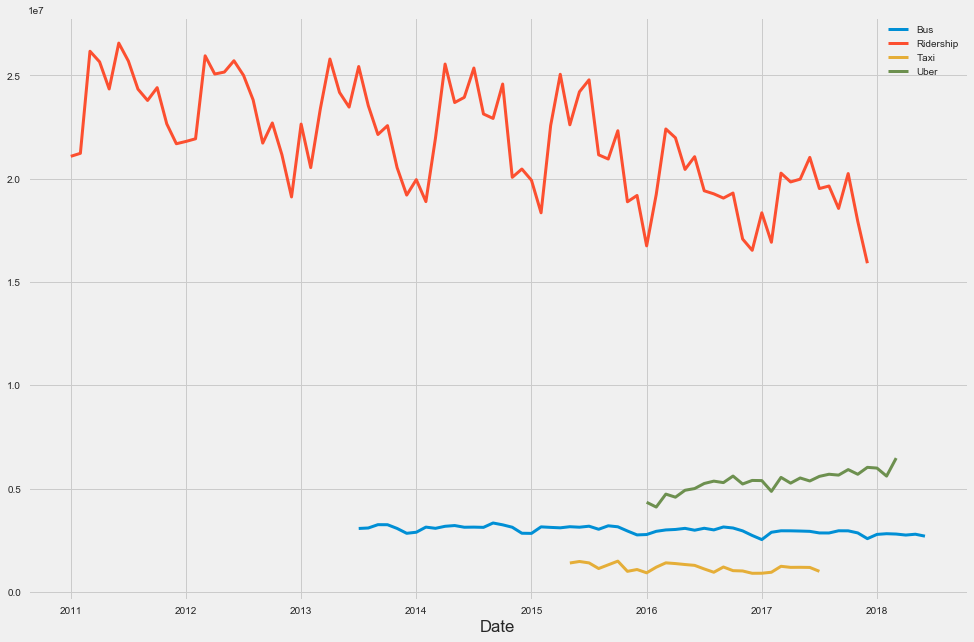

In [125]:
plt.style.use('fivethirtyeight')
f, ax = plt.subplots(figsize=(15,10))
combined_df.plot(ax=ax,linewidth=3)
plt.show()

In [ ]:
metro_df = metro_df[['Date','ROTP', 'RailReliability', 'MetroAccessOTP', 'EscalatorAvail',
       'ElevatorAvail', 'TotalInjuries', 'Crime',]]
metro_df = metro_df.set_index('Date')

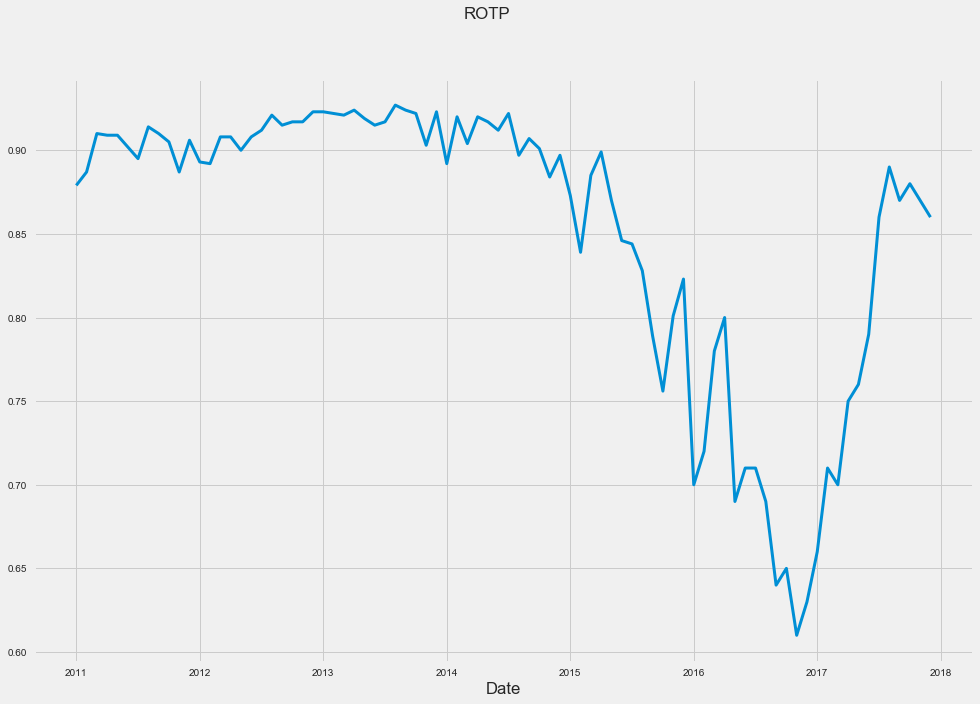

In [147]:
f, ax2 = plt.subplots(figsize=(15,10))
metro_df['ROTP'].plot(ax=ax2,linewidth=3)
plt.suptitle('ROTP')
plt.show()


In [143]:
metro_df.head()

,ROTP,RailReliability,MetroAccessOTP,EscalatorAvail,ElevatorAvail,TotalInjuries,Crime
Date,,,,,,,
2011-01-01,0.879,48241,0.901,0.888,96.30%,2.08,6.39
2011-02-01,0.887,37703,0.890,0.866,96.00%,1.66,4.68
2011-03-01,0.910,50328,0.913,0.869,96.90%,2.16,3.96
2011-04-01,0.909,39302,0.912,0.862,96.40%,2.21,4.72
2011-05-01,0.909,37355,0.922,0.825,97.40%,1.69,7.32
